# 4.6 Lab: Logistic Regression, LDA, QDA, and KNN

## 4.6.1 The Stock Market Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Smarket = pd.read_csv('data/Smarket.csv', index_col=0)
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
# get size
print(Smarket.shape)

# get column names
print(Smarket.columns)

# descriptions of each column
Smarket.describe(include='all')


(1250, 9)
Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


In [4]:
# pairwise correlations are very low
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


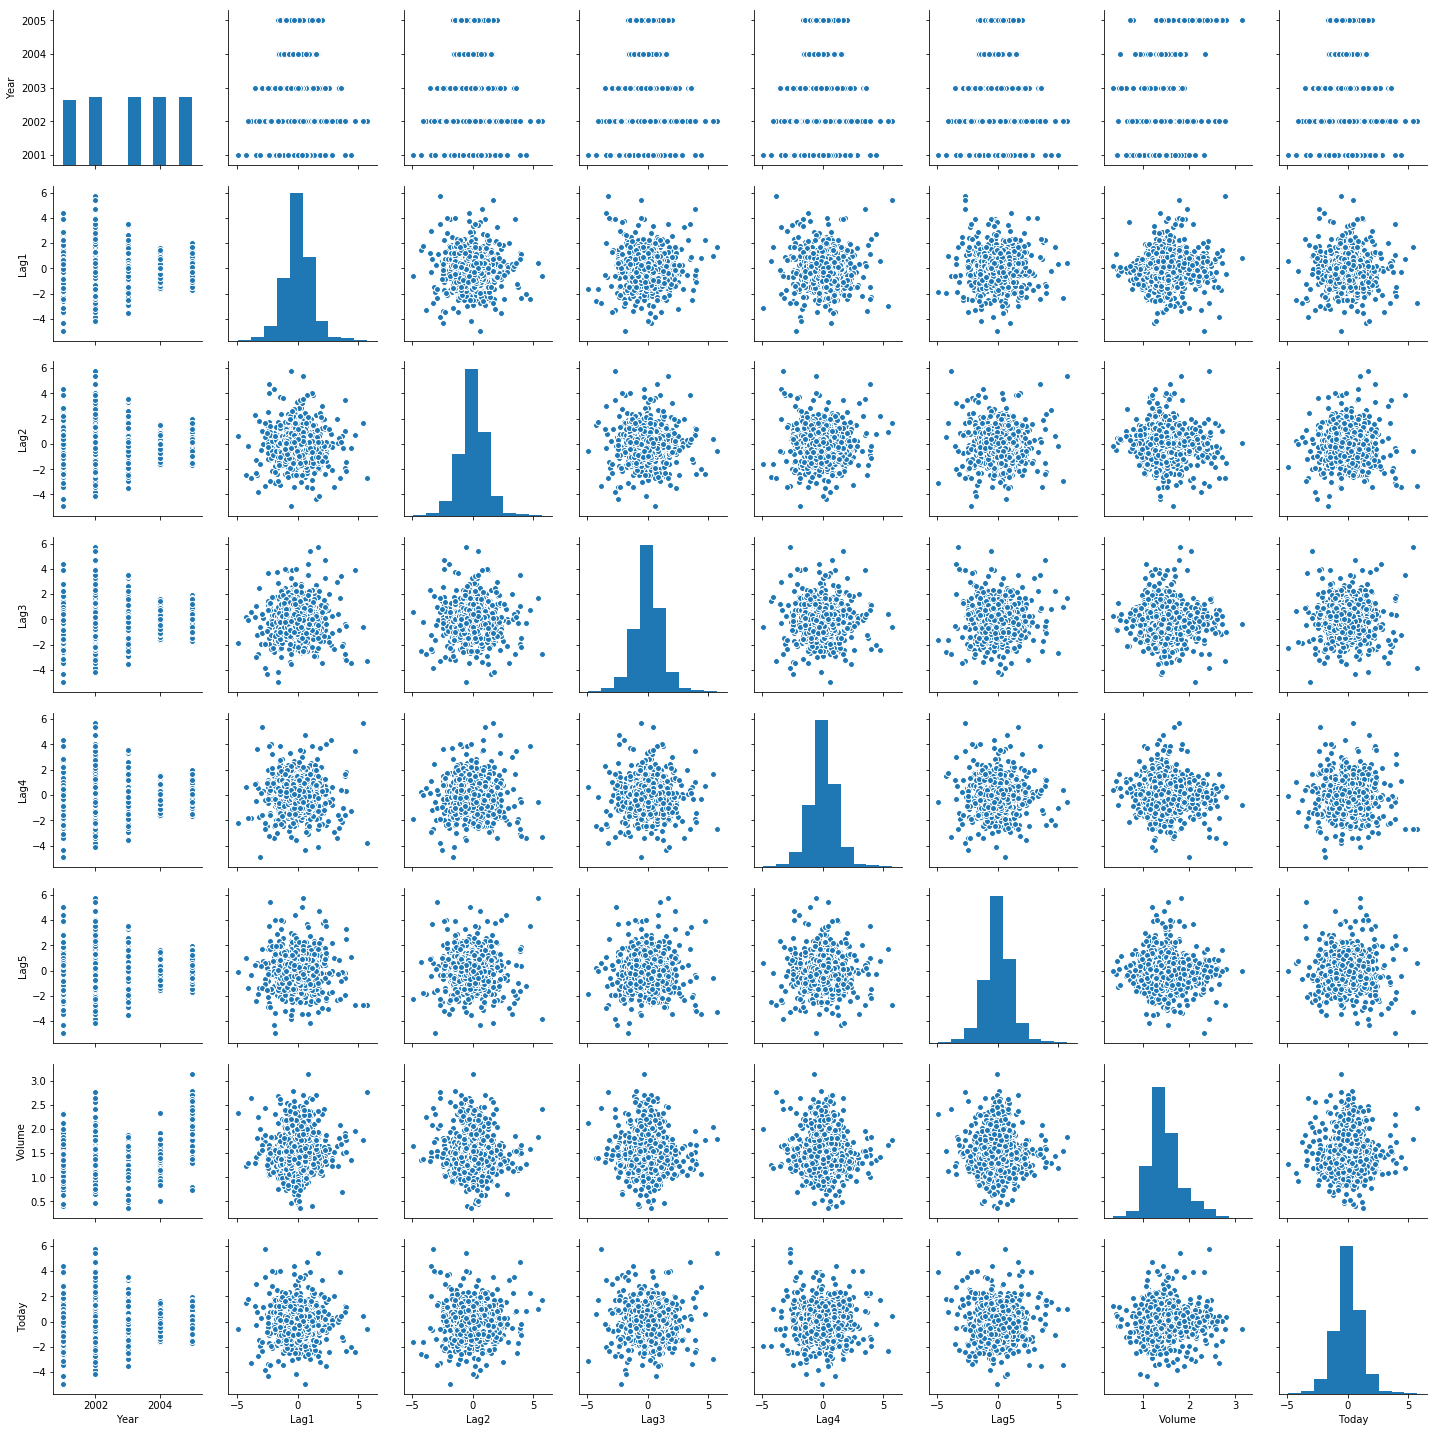

In [5]:
# re-check with pairwise plot
sns.pairplot(Smarket)

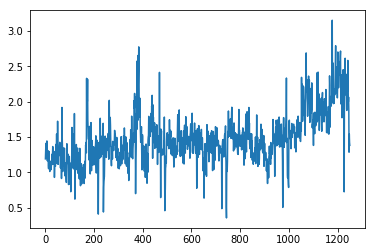

In [6]:
# volume tends to increase by year
plt.plot(Smarket.Volume)

## 4.6.2 Logistic Regression

### Initial version using `statsmodels`

In [7]:
# Convert Direction (categorical variable) into dummy/indicator variables
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
Smarket_enc = pd.get_dummies(Smarket, drop_first=True)
Smarket_enc.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = 'Direction_Up ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
                   data=Smarket_enc, family=sm.families.Binomial())
fit = model.fit()
fit.summary()

/Users/yyoo/stat/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Wed, 02 May 2018   Deviance:                       1727.6
Time:                        10:43:31   Pearson chi2:                 1.25e+03
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [9]:
# predict the probabilities of Up
prob = fit.predict()
print(prob)

# convert the probability to Up/Down
Yhat = 1*(prob>0.5)  # quick way to convert boolean variables to inteters


[0.50708413 0.48146788 0.48113883 ... 0.5392683  0.52611829 0.51791656]


In [10]:
# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# true Y
Y = Smarket_enc.Direction_Up
print(Y.head())

#yEnc = y.replace(to_replace={1:'Up', 0:'Down'}) # convert true labels to Up/Down
metrics.confusion_matrix(Y,Yhat,labels=(1,0))

1    1
2    1
3    0
4    1
5    1
Name: Direction_Up, dtype: uint8


array([[507, 141],
       [457, 145]])

In [11]:
# let's manually check
print(sum((Y == 1) & (Yhat == 1)))    # 507 Ups are (correctly) predicted as Ups
print(sum((Y == 1) & (Yhat == 0)))  # 141 Ups are predicted as Downs
print(sum((Y == 0) & (Yhat == 1)))    # 457 Downs are predicted as Ups
print(sum((Y == 0) & (Yhat == 0)))  # 145 Ups are (correctly) predicted as Downs

507
141
457
145


In [12]:
# average accuracy 
np.mean(Y==Yhat)

0.5216

### Let's re-fit the model and test with truely unseen data!

In [13]:
print(Smarket.shape)  # 1250 samples
idxTrain=Smarket_enc['Year']<2005 # use 998 samples for training!
sum(idxTrain)

(1250, 9)


998

In [14]:
# select training data (year < 2005)
Smarket_enc_train = Smarket_enc.loc[idxTrain]
print(Smarket_enc_train.shape)
Smarket_enc_train.tail()

(998, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
994,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,0
995,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,1
996,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,0
997,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,1
998,2004,0.008,-0.007,0.715,-0.431,0.046,0.8298,-0.134,0


In [15]:
# select test data (year = 2005)
Smarket_enc_test = Smarket_enc.loc[~idxTrain]
print(Smarket_enc_test.shape)
Smarket_enc_test.head()

(252, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
999,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,0
1000,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,0
1001,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,0
1002,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,1
1003,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,0


In [16]:
# re-fit using the training data only!
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = 'Direction_Up ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
                data=Smarket_enc_train, family=sm.families.Binomial())
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                  998
Model:                            GLM   Df Residuals:                      991
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -690.55
Date:                Wed, 02 May 2018   Deviance:                       1381.1
Time:                        10:43:32   Pearson chi2:                     998.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [17]:
# Then, test for the test data
Xtest = sm.add_constant(Smarket_enc_test.loc[:, 'Lag1':'Volume'])  # prepare predictors WITH CONSTANT!
Ytest = Smarket_enc_test.Direction_Up

prob = fit.predict(Xtest)
#prob.head()
Yhat = 1*(prob>0.5)

In [18]:
# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

metrics.confusion_matrix(Ytest,Yhat,labels=(1,0))

array([[44, 97],
       [34, 77]])

In [19]:
# accuracy
np.mean(Ytest==Yhat)

0.4801587301587302

### Let's use only two predictors, Lag1 and Lag2.

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = 'Direction_Up ~ Lag1+Lag2', 
                   data=Smarket_enc_train, family=sm.families.Binomial())
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                  998
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -690.70
Date:                Wed, 02 May 2018   Deviance:                       1381.4
Time:                        10:43:32   Pearson chi2:                     998.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.052     -1.076      0.282      -0.157       0.046
Lag2          -0.0445      0.052     -0.861      0.389      -0.146       0.057
==============================================================================
"""

In [21]:
prob = fit.predict(Xtest)
Yhat = 1*(prob>0.5)

# confusion matrix
metrics.confusion_matrix(Ytest,Yhat,labels=(1,0))

array([[106,  35],
       [ 76,  35]])

In [22]:
# accuracy 
np.mean(Ytest==Yhat)     # It's actually better!

0.5595238095238095

### Exercise
Repeat the logistic regression examples with sklearn.

## 4.6.3 Linear Discriminant Analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data
Smarket = pd.read_csv('data/Smarket.csv', index_col=0)
Smarket.head()
Smarket_enc = pd.get_dummies(Smarket, drop_first=True)
Smarket_enc.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [24]:
# select training data (year < 2005)
idxTrain=Smarket['Year']<2005 # use 998 samples for training!
Smarket_train = Smarket_enc.loc[idxTrain]
Smarket_test = Smarket_enc.loc[~idxTrain]
#Smarket_train.head()
#Smarket_test.head()

Xtrain = Smarket_train.loc[:, 'Lag1':'Lag2']
#Xtrain = Smarket_train.loc[:, 'Lag1':'Volume']
Ytrain = Smarket_train.loc[:, 'Direction_Up']

Xtest = Smarket_test.loc[:, 'Lag1':'Lag2']
#Xtest = Smarket_test.loc[:, 'Lag1':'Volume']
Ytest = Smarket_test.loc[:, 'Direction_Up']

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

# fit LDA
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(Xtrain, Ytrain)

# fit results
print(lda.priors_)
print(lda.means_)

print(lda.intercept_)
print(lda.coef_)

[0.49198397 0.50801603]
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[0.03221375]
[[-0.05544078 -0.0443452 ]]


In [26]:
# predict
lda_pred = lda_fit.predict(Xtest)

from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, lda_pred)

array([[ 35,  76],
       [ 35, 106]])

In [27]:
# accuracy
np.mean(Ytest==lda_pred)

0.5595238095238095

In [28]:
# You can calculate probability 
lda_prob = lda.predict_proba(Xtest)

In [29]:
sum(lda_prob[:,0]>=0.5)

70

In [30]:
sum(lda_prob[:,0]<0.5)

182

In [31]:
sum(lda_prob[:,0]>0.9)

0

## 4.6.4 Quadratic Discriminant Analysis

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

# fit QDA
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(Xtrain, Ytrain)

# fit results
print(qda.priors_)
print(qda.means_)


[0.49198397 0.50801603]
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [33]:
# predict
qda_pred = qda_fit.predict(Xtest)

from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, qda_pred)

array([[ 30,  81],
       [ 20, 121]])

In [34]:
# accuracy
np.mean(Ytest==qda_pred)

0.5992063492063492

### 4.6.5 K-Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn_pred = knn.fit(Xtrain, Ytrain).predict(Xtest)

confusion_matrix(Ytest, knn_pred)

array([[43, 68],
       [58, 83]])

In [36]:
# accuracy
np.mean(Ytest==knn_pred)

0.5

In [37]:
# KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = knn.fit(Xtrain, Ytrain).predict(Xtest)

confusion_matrix(Ytest, knn_pred)

array([[48, 63],
       [55, 86]])

In [38]:
# accuracy
np.mean(Ytest==knn_pred)

0.5317460317460317

### 4.6.6 An Application to Caravan Insurance Data

In [39]:
Caravan = pd.read_csv('data/Caravan.csv', index_col=0)
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [40]:
# TODO: compare KNN vs. Logistic Regression